In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def pdf_estimator(x_range, x_sample, kernel, smoothing=0.5):
    estimator = lambda x: 1/(len(x_sample)*smoothing)*np.sum(kernel((x.reshape(-1,1)-x_sample)/smoothing),axis=1)
    return estimator(x_range)

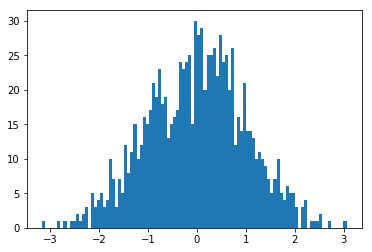

In [30]:
sample = np.random.randn(1000)
_ = plt.hist(sample,bins=100)

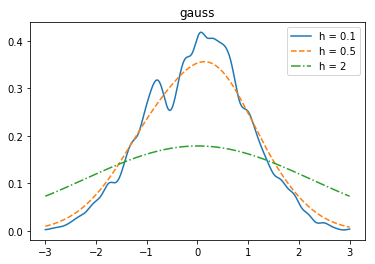

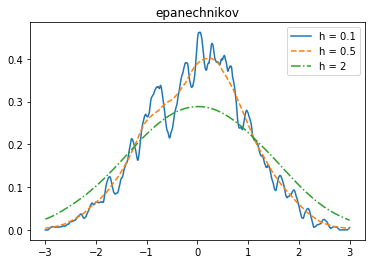

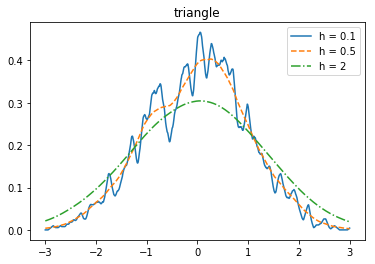

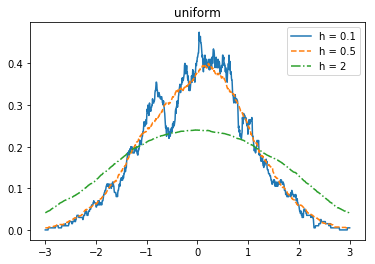

In [72]:
X = np.linspace(-3,3,1000)
linestyle = ['-', '--', '-.', ':']

lines = []
def gauss(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
def epanechnikov(x):
    y = (x>-1)*(x<1)*3/4
    return y*(1-x**2)
def triangle(x):
    y = (x>-1)*(x<1)
    return y*(1-np.abs(x))
def uniform(x):
    y = (x>-1)*(x<1)
    return y*1/2
for kernel in [gauss, epanechnikov, triangle, uniform]:
    fig, ax = plt.subplots()
    for num, h in enumerate([0.1, 0.5, 2]):
        ax.plot(X, pdf_estimator(X, sample, kernel=kernel, smoothing=h), linestyle=linestyle[num])
        lines.append('h = {}'.format(h))
    ax.legend(lines)
    ax.set_title(kernel.__name__)